In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import dataset
original_election_data = pd.read_csv("election_train.csv")
demographic_data = pd.read_csv("demographics_train.csv")
original_election_data
#demographic_data

,Year,State,County,Office,Party,Votes
0,2018,AZ,Apache County,US Senator,Democratic,16298.0
1,2018,AZ,Apache County,US Senator,Republican,7810.0
2,2018,AZ,Cochise County,US Senator,Democratic,17383.0
3,2018,AZ,Cochise County,US Senator,Republican,26929.0
4,2018,AZ,Coconino County,US Senator,Democratic,34240.0
5,2018,AZ,Coconino County,US Senator,Republican,19249.0
6,2018,AZ,Gila County,US Senator,Democratic,7643.0
7,2018,AZ,Gila County,US Senator,Republican,12180.0
8,2018,AZ,Graham County,US Senator,Democratic,3368.0
9,2018,AZ,Graham County,US Senator,Republican,6870.0


In [5]:
#Task 1 : Reshape from long format to wide format
election_data = pd.pivot_table(original_election_data, index=['Year','State','County', 'Office'], columns=['Party'], values=['Votes'], aggfunc=np.sum).reset_index()
election_data.columns = election_data.columns.droplevel(1)
election_data.columns = ["Year", "State", "County", "Office", "Democratic Votes", "Republican Votes"]
election_data

,Year,State,County,Office,Democratic Votes,Republican Votes
0,2018,AZ,Apache County,US Senator,16298.0,7810.0
1,2018,AZ,Cochise County,US Senator,17383.0,26929.0
2,2018,AZ,Coconino County,US Senator,34240.0,19249.0
3,2018,AZ,Gila County,US Senator,7643.0,12180.0
4,2018,AZ,Graham County,US Senator,3368.0,6870.0
5,2018,AZ,La Paz County,US Senator,1609.0,3265.0
6,2018,AZ,Maricopa County,US Senator,732671.0,672505.0
7,2018,AZ,Mohave County,US Senator,19214.0,50209.0
8,2018,AZ,Navajo County,US Senator,16624.0,18767.0
9,2018,AZ,Pima County,US Senator,221242.0,160550.0


In [6]:
#election_data['County'].replace({'County', ''}, inplace=True, regex=False )
election_data['County'] = election_data['County'].str.replace('County', '')
election_data['County'] = election_data['County'].str.strip()
election_data['State'] = election_data['State'].str.strip()
#election_data
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
election_data = election_data.replace({"State":states})
demographic_data['State'] = demographic_data['State'].str.strip()
demographic_data['County'] = demographic_data['County'].str.strip()

demographic_data['State'] = demographic_data['State'].str.upper()
election_data['State'] = election_data['State'].str.upper()
election_data['County'] = election_data['County'].str.upper()
demographic_data['County'] = demographic_data['County'].str.upper()
election_data
#demographic_data
#election_data.count()

,Year,State,County,Office,Democratic Votes,Republican Votes
0,2018,ARIZONA,APACHE,US Senator,16298.0,7810.0
1,2018,ARIZONA,COCHISE,US Senator,17383.0,26929.0
2,2018,ARIZONA,COCONINO,US Senator,34240.0,19249.0
3,2018,ARIZONA,GILA,US Senator,7643.0,12180.0
4,2018,ARIZONA,GRAHAM,US Senator,3368.0,6870.0
5,2018,ARIZONA,LA PAZ,US Senator,1609.0,3265.0
6,2018,ARIZONA,MARICOPA,US Senator,732671.0,672505.0
7,2018,ARIZONA,MOHAVE,US Senator,19214.0,50209.0
8,2018,ARIZONA,NAVAJO,US Senator,16624.0,18767.0
9,2018,ARIZONA,PIMA,US Senator,221242.0,160550.0


In [17]:
#Task 2
merged_data = pd.merge(election_data, demographic_data, how='inner', on=['State','County'])
#merged_data[merged_data['County']==""]
#merged_data.dtypes
#merged_data.isnull().sum()
merged_data.head()

,Year,State,County,Office,Democratic Votes,Republican Votes,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino",...,Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,2018,ARIZONA,APACHE,US Senator,16298.0,7810.0,4001,72346,0,18.571863,...,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076
1,2018,ARIZONA,COCHISE,US Senator,17383.0,26929.0,4003,128177,92915,56.299492,...,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067
2,2018,ARIZONA,COCONINO,US Senator,34240.0,19249.0,4005,138064,104265,54.619597,...,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066
3,2018,ARIZONA,GILA,US Senator,7643.0,12180.0,4007,53179,0,63.222325,...,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000
4,2018,ARIZONA,GRAHAM,US Senator,3368.0,6870.0,4009,37529,0,51.461536,...,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399


In [18]:
#Task 5
merged_data['Party'] = np.where(merged_data['Democratic Votes'] > merged_data['Republican Votes'], 1, 0)
#merged_data[['Democratic Votes', 'Republican Votes', 'Party']]
merged_data.columns

Index(['Year', 'State', 'County', 'Office', 'Democratic Votes',
       'Republican Votes', 'FIPS', 'Total Population',
       'Citizen Voting-Age Population',
       'Percent White, not Hispanic or Latino',
       'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
       'Percent Foreign Born', 'Percent Female', 'Percent Age 29 and Under',
       'Percent Age 65 and Older', 'Median Household Income',
       'Percent Unemployed', 'Percent Less than High School Degree',
       'Percent Less than Bachelor's Degree', 'Percent Rural', 'Party'],
      dtype='object')

In [9]:
#Task 6(TODO)
demo_mean = merged_data.groupby(['Party']).get_group(1).mean()
repub_mean = merged_data.groupby(['Party']).get_group(0).mean()
demo_mean['Total Population'] > repub_mean['Total Population']

True

In [10]:
#Task 7(TODO)
demo_mean = merged_data.groupby(['Party']).get_group(1).mean()
repub_mean = merged_data.groupby(['Party']).get_group(0).mean()
demo_mean['Median Household Income'] > repub_mean['Median Household Income']

True

In [35]:
pd.options.mode.chained_assignment = None  # default='warn'
age_data = merged_data[['Percent Age 29 and Under','Percent Age 65 and Older','Party']]
age_data['Percent Age 29 to 65'] = 100 - age_data['Percent Age 29 and Under'] - age_data['Percent Age 65 and Older']
#list(age_data.columns.values)
age_data= age_data[['Percent Age 29 and Under','Percent Age 29 to 65','Percent Age 65 and Older','Party']]
age_data.head()

,Percent Age 29 and Under,Percent Age 29 to 65,Percent Age 65 and Older,Party
0,45.854643,40.823266,13.322091,1
1,37.902276,42.341450,19.756275,0
2,48.946141,40.179917,10.873943,1
3,32.238290,41.364072,26.397638,0
4,46.393456,41.290735,12.315809,0


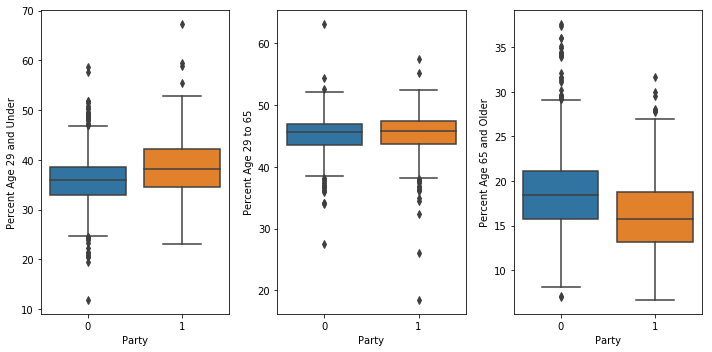

In [38]:
#Task 8()
num_columns = len(age_data.columns)
fig, axes = plt.subplots(1, num_columns-1, figsize = (10, 5))
for i in range(num_columns-1):
    sns.boxplot(x = 'Party', y = age_data.columns[i], data = age_data, orient = 'v', ax = axes[i])
plt.tight_layout()